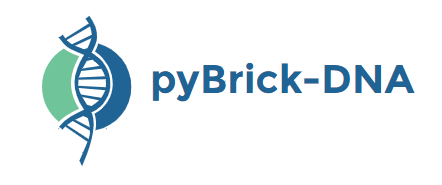


> pyBrick-DNA is an interactive "open source" platform, which uses the Python programming language, in order to **automatically** build genetic expression components for **eukaryotic and prokaryotic** organisms. It also includes the option to build constructions of **CRISPR** (Clustered Regularly Interspaced Short Palindromic Repeats) editing systems for plants. For both cases, the graphic visualization of the genetic set and its download in **GenBank (.gb)** format is available, which allows exporting the sequences together with their annotations for later use on other platforms (ex. SnapGene or Benchling) without the need to carry out this process manually.



**pyBrick-DNA** was developed by:



*   Gladys Cavero Rozas                **ᵃ**
*   Jose Martin Cisneros Mandujano **ᵃ**
*   Yomali Ferreyra Chombo **ᵃ**
*   Daniela Moreno **ᵇ**
*   Yerko Ortiz **ᵇ**
*   Martin Gutierrez **ᵇ**
*   Alberto Donayre Torres **ᵃ**


**ᵃ**     Universidad de Ingenieria y Tecnologia (UTEC) - Lima, Peru (adonayre@utec.edu.pe)

**ᵇ**     Universidad Diego Portales - Santiago, Chile (martin.gutierrez@mail.udp.cl)


In [1]:
# @markdown #**[IMPORTANT]**

# @markdown Download packages and libraries before using the program
from __future__ import print_function
!pip install dna_features_viewer
from dna_features_viewer import GraphicFeature, GraphicRecord,CircularGraphicRecord

import ipywidgets as widgets
from ipywidgets import HBox, VBox

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from google.colab import files
from ipywidgets import Button

# Databases
!gdown --id 1Ci2j_f2zxyPiBavLfaXXzsV-LrWE6IGW #Prokaryote
pro = "db_prokaryote.csv"

!gdown --id 1j7iJ2CjcAwaWxJsf6kKHa79bpCh55k7N #Eukaryote
euk = "db_eukaryote.csv"

!gdown --id 10uL4eKXFOv2RpggWUH6YGFSTuhZBscl7 #Eukaryote Plants
eukplant = "db_eukaryote_plants.csv"

!wget https://raw.githubusercontent.com/Edinburgh-Genome-Foundry/DnaFeaturesViewer/master/docs/_static/images/title.png -O assembly.png




db_proka = {'Regulatory' :{},
            'RBS':{},
            'Terminator':{},
            'CDS':{}
            }

db_euka = {'Regulatory' :{},
            'RBS':{},
            'Terminator':{},
            'CDS':{}
            }

db_euka_plant = {'Regulatory' :{},
            'RBS':{},
            'Terminator':{},
            'CDS':{}
            }


import csv
with open(pro, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
      row[6]= row[6].upper()
      if row[2] == 'Regulatory':
        db_proka['Regulatory'][row[7]] = [row[0], row[1], row[6]]
      elif row[2] == 'RBS':
        db_proka["RBS"][row[7]] = [row[0], row[1], row[6]]
      elif row[2] == 'Terminator':
        db_proka["Terminator"][row[7]] =   [row[0], row[1], row[6]]
      elif row[2] == 'CDS':
        db_proka["CDS"][row[7]] =   [row[0], row[1], row[6]]

with open(euk, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
      row[6]= row[6].upper()
      if row[2] == 'Regulatory':
        db_euka['Regulatory'][row[7]] =  [row[0], row[1], row[6]]
      elif row[2] == 'RBS':
        db_euka["RBS"][row[7]] =  [row[0], row[1], row[6]]
      elif row[2] == 'Terminator':
        db_euka["Terminator"][row[7]] =  [row[0], row[1], row[6]]
      elif row[2] == 'CDS':
        db_proka["CDS"][row[7]] =   [row[0], row[1], row[6]]

with open(eukplant, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
      row[6]= row[6].upper()
      if row[2] == 'Regulatory':
        db_euka_plant['Regulatory'][row[7]] =  [row[0], row[1], row[6]]
      elif row[2] == 'RBS':
        db_euka_plant["RBS"][row[7]] =  [row[0], row[1], row[6]]
      elif row[2] == 'Terminator':
        db_euka_plant["Terminator"][row[7]] =  [row[0], row[1], row[6]]
      elif row[2] == 'CDS':
        db_proka["CDS"][row[7]] =   [row[0], row[1], row[6]]




# Se carga la base de datos
!gdown --id 186JwRyTyhQQXiD9LK2WJt0msBHJH57cX
database = 'Database.csv'


d1 = {
    'prokaryote': {   
        'prom' :{
            'fullpro':{},
            'minpro':{}
            },

        'RBS':{},
        'term':{},
        'CDS':{}
},
    'eukaryote(mammal)' : {   
        'prom' :{
            'fullpro':{},
            'minpro':{}
            },

        'RBS':{},
        'term':{},
        'CDS':{}
},
      'eukaryote(plant)':{   
        'prom' :{
            'fullpro':{},
            'minpro':{}
            },

        'RBS':{},
        'gene':{},
        'other':{},
        'term':{},
        'CDS':{}
}, 'box':{}

}



import csv
with open(database, 'r') as file:
    reader = csv.reader(file)
    
    for row in reader:
      row[4]= row[4].upper()
      if row[1] == 'prokaryote':
        if row[3] == 'fullpro':
          d1['prokaryote']['prom']['fullpro'][row[0]] = row[4]
        elif row[3] == 'minpro':
          d1['prokaryote']['prom']['minpro'][row[0]] = row[4]
        elif row[3] == 'RBS':
          d1['prokaryote']['RBS'][row[0]] = row[4]
        elif row[3] == 'terminator':
          d1['prokaryote']['term'][row[0]] = row[4]
        elif row[3] == 'CDS':
          d1['prokaryote']['CDS'][row[0]] = row[4]

      elif row[2] == 'plant':
          if row[3] == 'fullpro':
            d1['eukaryote(plant)']['prom']['fullpro'][row[0]] = row[4]
          elif row[3] == 'minpro':
            d1['eukaryote(plant)']['prom']['minpro'][row[0]] = row[4]
          elif row[3] == 'RBS':
            d1['eukaryote(plant)']['RBS'][row[0]] = row[4]
          elif row[3] == 'terminator':
            d1['eukaryote(plant)']['term'][row[0]] = row[4]
          elif row[3] == 'CDS':
            d1['eukaryote(plant)']['CDS'][row[0]] = row[4]

          elif row[3] == 'gene':
            d1['eukaryote(plant)']['gene'][row[0] ] = row[4]

          elif row[3] == 'other':
            d1['eukaryote(plant)']['other'][row[0] ] = row[4]


      elif row[2] == 'mammal':
        if row[3] == 'fullpro':
            d1['eukaryote(mammal)']['prom']['fullpro'][row[0]] = row[4]
        elif row[3] == 'minpro':
          d1['eukaryote(mammal)']['prom']['minpro'][row[0]] = row[4]
        elif row[3] == 'RBS':
          d1['eukaryote(mammal)']['RBS'][row[0]] = row[4]
        elif row[3] == 'terminator':
          d1['eukaryote(mammal)']['term'][row[0]] = row[4]
        elif row[3] == 'CDS':
          d1['eukaryote(mammal)']['CDS'][row[0]] = row[4]


      if row[3] == 'box':
        d1['box'][row[0]] = row[4]

# Read Fasta

import io
import pandas as pd
from io import StringIO
from Bio import SeqIO

def fasta_read(upload_tab):
    #convert dic to str
  prueba = list(upload_tab.value.values())[0]
  content= prueba['content'].decode('utf-8')
  #print(content)

  #convert string to fasta
  fasta_string = content

  fasta_io = StringIO(fasta_string) 

  records = SeqIO.parse(fasta_io, "fasta") 

  for rec in records:
      #print(rec)
      name=rec.name
      description=rec.description
      sequence=rec.seq
  
  fasta_io.close()


  return description, str(sequence)




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 8.1 MB/s 
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Ci2j_f2zxyPiBavLfaXXzsV-LrWE6IGW
To: /content/db_prokaryote.csv
100% 292k/292k [00:00<00:00, 66.0MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1j7iJ2CjcAwaWxJsf6kKHa79bpCh55k7N
To: /content/db_eukaryote.csv
100% 100k/100k [00:00<00:00, 66.7MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id`

# User Instructions

1. **Choose** the organism that you are going to use: **prokaryote** or **eukaryote** (mammals/plants)

2. **Choose** or type your promoter sequence **(constitutive/
inducible)**

    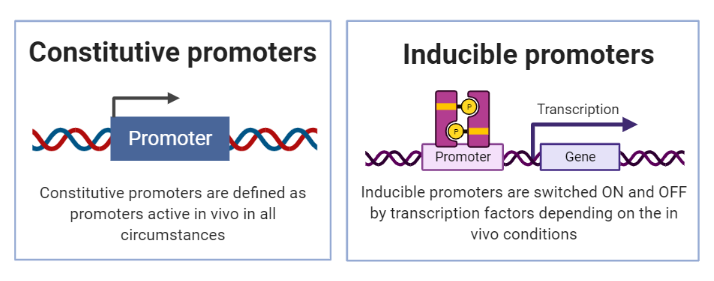

3. **Choose** or type your ribosome binding sequence (RBS) if apply
4. **Type** your gene sequence sequence
5. **Choose** or type your terminator sequence
6. **Download** the .gb file which contains the assembled sequence

## Some tips:

- If you do not find the sequence you want to work with, select the personalized option.
- **Don't forget** to press the **OK button** at every stage.

# Widget

In [ ]:
# @markdown # Run to show widget
# @markdown Select the components and do not forget to press OK

html_organism = widgets.HTML(
    value="Select an <b>organism:</b>",
    placeholder='Personalized promoter',
    description='',
)

organism_dropdownW = widgets.Dropdown(
    options=[('[Select an option]', None), ('Prokayote', db_proka), ('Eukaryote(Mammal)', db_euka), ('Eukatyote(Plant)', db_euka_plant)],
    description='Number:')



tab_organism = VBox([html_organism , organism_dropdownW])


# Regulatory Section #########################################################
# Constitutive Option
# ------------------------SELECTION-----------------------------------------------------------

html_regulatory = widgets.HTML(
    value="Select a <b>regulatory element</b> and press OK:",
    placeholder='Personalized promoter',
    description='',
)

ch_fullW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False)

tab_promoter_constitutiveW = widgets.Combobox(
    options= [''], #db['Regulatory'].keys(),
    description='Full:',
    disabled = False
)



# Regulatory Customer Selection ################################################################# 

ch_freeW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

tab_promoter_free_nameW = widgets.Text(
    placeholder='Type your customized name',
    description='Name:',
    disabled=False
)

tab_promoter_free_seqW = widgets.Textarea(
    placeholder='Type your customized promoter sequence',
    description='Sequence:',
    disabled=False
)


tab_promoter_free = HBox([ch_freeW,
                                        tab_promoter_free_nameW,
                                        tab_promoter_free_seqW])


html_customer = widgets.HTML(
    value="Or insert your <b>custom</b> promoter",
    placeholder='Personalized promoter',
    description='',
)

# upload Promoter
html_promoter_upload = widgets.HTML(
    value="Or upload a <b>fasta file</b> with your own promoter",
    placeholder='Personalized promoter',
    description='',
)

promoter_upload_buttonW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

promoter_uploadW = widgets.FileUpload(
    accept='.fasta',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)

ch_fullW.style.button_color= "lightgreen"

promoter_list = HBox([tab_promoter_constitutiveW, ch_fullW ])
promoter_free = HBox([tab_promoter_free_nameW, tab_promoter_free_seqW, ch_freeW])
promoter_file = HBox([promoter_upload_buttonW , promoter_uploadW ])

tab_promoter = VBox([html_regulatory , 
                     promoter_list , 

                     html_customer, 
                     promoter_free,

                     html_promoter_upload,
                     promoter_file])


#tab2.set_title(0, 'Full Promoter')
#tab2.set_title(1, 'Min Promoter')
#tab2.set_title(2, 'Free')



# RBS Selection ####################################################################
RBS_buttonW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

RBS_dropdownW = widgets.Combobox(
    options= [''], #db['RBS'].keys(),
    description='Full:',
    disabled = False
)

# RBS Customer Selection ################################################################# 

html_rbs = widgets.HTML(
    value="Select a <b>RBS element</b> and press OK:",
    placeholder='Personalized promoter',
    description='',
)


RBS_custom_buttonW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

RBS_custom_nameW = widgets.Text(
    placeholder='Type your customized name',
    description='Name:',
    disabled=False
)

RBS_custom_seqW = widgets.Textarea(
    placeholder='Type your customized promoter sequence',
    description='Sequence:',
    disabled=False
)

# upload RBS
html_RBS_upload = widgets.HTML(
    value="Or upload a <b>fasta file</b> with your own RBS",
    placeholder='Personalized promoter',
    description='',
)

RBS_upload_buttonW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

RBS_uploadW = widgets.FileUpload(
    accept='.fasta',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)




rbs_list = HBox([RBS_dropdownW, RBS_buttonW])
rbs_customer = HBox([RBS_custom_nameW, RBS_custom_seqW, RBS_custom_buttonW])
rbs_file = HBox([RBS_uploadW, RBS_upload_buttonW ])

tab_rbs= VBox([html_rbs, rbs_list ,
               html_customer , rbs_customer,
               html_RBS_upload, rbs_file
               ])


# GENE SELECTION ####################################################################
html_gene_list = widgets.HTML(
    value="Select a <b> gene element: </b> ",
    placeholder='Personalized promoter',
    description='',
)

gene_buttonW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

gene_dropdownW = widgets.Combobox(
    options= [''], #db['CDS'].keys(),
    description='Full:',
    disabled = False
)

####################33

p2 = widgets.HTML(
    value="Insert your <b>custom</b> gene",
    placeholder='Personalized gene',
    description='') 

ch_gene_freeW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False)

tab_gene_free_nameW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False)

tab_gene_free_seqW = widgets.Textarea(
    placeholder='Type sequence',
    description='Sequence:',
    disabled=False)



# --------------------------------------------------------
# upload gene
html_gene_upload = widgets.HTML(
    value="Or upload a <b>fasta file</b> with gene sequence",
    placeholder='Personalized promoter',
    description='',
)

gene_upload_buttonW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

gene_uploadW = widgets.FileUpload(
    accept='.fasta',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)


tab_gene = VBox([ html_gene_list, 
                 HBox ([gene_dropdownW, gene_buttonW] ),   

                 p2, 
                 HBox([tab_gene_free_nameW , tab_gene_free_seqW, ch_gene_freeW]),
                 
                 html_gene_upload,
                 HBox([gene_uploadW,gene_upload_buttonW  ]) ])

# TERMINATOR SELECTION ####################################################################

ch_term_optionsW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

ch_term_freeW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

# TERMINATOR---------------------------------------------------------------------------

html_terminator = widgets.HTML(
    value="Select a <b>terminator element</b> and press OK:",
    placeholder='Personalized promoter',
    description='',
)

tab_term_selectionW = widgets.Dropdown(
    options= [""], #db['Terminator'].keys(),
    #rows=10,
    description='Terminator:',
    disabled=False
)

tab_term_free_nameW = widgets.Textarea(
    placeholder='Type your customized terminator name',
    description='Name:',
    disabled=False
)

tab_term_free_seqW = widgets.Textarea(
    placeholder='Type your customized terminator sequence',
    description='Sequence:',
    disabled=False
)

p3 = widgets.HTML(
    value="Insert your <b>custom</b> terminator",
    placeholder='Personalized terminator',
    description='',
)

# upload terminator
html_terminator_upload = widgets.HTML(
    value="Or upload a <b>fasta file</b> with your terminator sequence",
    placeholder='Personalized promoter',
    description='',
)

terminator_upload_buttonW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

terminator_uploadW = widgets.FileUpload(
    accept='.fasta',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)


term_list = HBox([tab_term_selectionW, ch_term_optionsW ])
term_free = HBox([tab_term_free_nameW, tab_term_free_seqW, ch_term_freeW  ])
term_upload = HBox([terminator_uploadW, terminator_upload_buttonW  ])

tab_terminator = VBox([html_terminator,
                       term_list , 
                       
                       p3, 
                       term_free, 
                       
                       html_terminator_upload,
                       term_upload ])


###########################################################  FINAL FUNCTION

def function_promoter(
    
                      organism_dropdown,

                      ch_full, 
                      tab_promoter_constitutive,

                      ch_free,
                      tab_promoter_free_name,
                      tab_promoter_free_seq,

                      promoter_upload_button,
                      promoter_upload,
                      
                      RBS_button,
                      RBS_dropdown ,
                      
                      RBS_custom_button,
                      RBS_custom_name ,
                      RBS_custom_seq,

                      RBS_upload_button,
                      RBS_upload,
                                           
                      gene_button,
                      gene_dropdown,
                      
                      ch_gene_free,
                      tab_gene_free_name,
                      tab_gene_free_seq,

                      gene_upload_button,
                      gene_upload,

                      
                      ch_term_options ,                      
                      tab_term_selection ,

                      ch_term_free ,
                      tab_term_free_name,
                      tab_term_free_seq,
                      
                      terminator_upload_button,
                      terminator_upload
                      ):

  name_promoter = ['']
  seq_promoter = ['']

  name_rbs = ['']
  seq_rbs = ['']

  name_gene = ['']  
  seq_gene = ['']

  name_term  = ['']
  seq_term = ['']
  
  db = organism_dropdown

  tab_promoter_constitutiveW.options = list(db['Regulatory'].keys())
  RBS_dropdownW.options = list(db['RBS'].keys())
  tab_term_selectionW.options = list(db['Terminator'].keys())
  gene_dropdownW.options = list(db['CDS'].keys())


  if db != db_proka:
    RBS_buttonW.disabled= True
    RBS_dropdownW.disabled= True
    RBS_custom_buttonW.disabled= True
    RBS_custom_nameW.disabled= True
    RBS_custom_seqW.disabled= True
  else:
    RBS_buttonW.disabled= False
    RBS_dropdownW.disabled= False
    RBS_custom_buttonW.disabled= False
    RBS_custom_nameW.disabled= False
    RBS_custom_seqW.disabled= False
    RBS_dropdownW.options = list(db['RBS'].keys())

  # ------------------PROMOTER--------------------------------------------------
  if ch_full == True and ch_free == False and promoter_upload_button == False:
    seq_promoter = [db['Regulatory'][tab_promoter_constitutive][2]]
    name_promoter = [tab_promoter_constitutive]
    type_promoter = ['regulatory']

  elif ch_full == False and ch_free == True and promoter_upload_button == False:
    name_promoter = [tab_promoter_free_name]
    seq_promoter = [tab_promoter_free_seq]
    type_promoter = [' regulatory']

  elif ch_full == False and ch_free == False and promoter_upload_button == True:
    
    p, q = fasta_read(promoter_uploadW)
    print(p,q)
    name_promoter = [p]
    seq_promoter = [q]
    type_promoter = ['regulatory']

  else:
    name_promoter = ['']
    seq_promoter = ['']
    type_promoter = ['']



  # ------------------RBS--------------------------------------------------
  if RBS_button == True and RBS_custom_button == False and RBS_upload_button == False :
    name_rbs = [RBS_dropdown]
    seq_rbs= [db['RBS'][RBS_dropdown][2]]
    type_rbs = ['misc_feature']

  elif RBS_button == False and RBS_custom_button == True and RBS_upload_button == False :
    name_rbs = [RBS_custom_name]
    seq_rbs = [RBS_custom_seq]
    type_rbs = ['misc_feature']

  elif RBS_button == False and RBS_custom_button == False and RBS_upload_button == True:

    n, m = fasta_read(RBS_uploadW)
    print(n,m)
    name_rbs = [n]
    seq_rbs = [m]
    type_rbs = ['misc_feature']


  else:
    name_term  = ['']
    seq_term = ['']
    type_rbs = ['']


  # ------------------Gene--------------------------------------------------
  
  if gene_button == True and ch_gene_free == False and gene_upload_button == False: 

    name_gene = [gene_dropdown]
    seq_gene = [db['CDS'][gene_dropdown][2]]
    type_gene = ['CDS']   

  elif gene_button == False and ch_gene_free == True and gene_upload_button == False: 
    
    name_gene = [tab_gene_free_name]  
    seq_gene = [tab_gene_free_seq]
    type_gene = ['CDS']

  elif gene_button == False and ch_gene_free == False and gene_upload_button == True: 

    r, s = fasta_read(gene_uploadW)
    print(r, s)
    name_rbs = [r]
    seq_rbs = [s]
    type_rbs = ['CDS']
  

  else:
    name_gene = ['']
    seq_gene = ['']
    type_gene = ['']


  # ------------------TERMINATOR--------------------------------------------------
  if ch_term_options == True and ch_term_free == False and terminator_upload_button == False:
    name_term = [tab_term_selection]
    seq_term = [db['Terminator'][tab_term_selection][2]]
    type_term = ['terminator']

  elif ch_term_options == False and ch_term_free == True and terminator_upload_button == False:
    name_term = [tab_term_free_name]
    seq_term = [tab_term_free_seq]
    type_term = ['terminator']

  elif ch_term_options == False and ch_term_free == False and terminator_upload_button == True:
    
    u, v = fasta_read(promoter_uploadW)
    print(u, v)
    name_term = [u]
    seq_term = [v]
    type_term = ['terminator']

  else:
    name_term  = ['']
    seq_term = ['']
    type_term = ['']

  if db != db_proka:

    X = name_promoter  + name_gene +  name_term 
    Y = seq_promoter  + seq_gene +    seq_term
    Z = type_promoter   + type_gene + type_term

  else:
    X = name_promoter  + name_rbs + name_gene +  name_term 
    Y = seq_promoter  + seq_rbs + seq_gene +    seq_term
    Z = type_promoter   + type_rbs + type_gene + type_term


  
  print(X,Y,Z)
  return X,Y,Z




mammal = widgets.interactive(function_promoter, 
                              
                        organism_dropdown = organism_dropdownW,

                        ch_full = ch_fullW,
                        ch_free = ch_freeW, 

                        tab_promoter_constitutive = tab_promoter_constitutiveW,                       
                        tab_promoter_free_name = tab_promoter_free_nameW,
                        tab_promoter_free_seq = tab_promoter_free_seqW,

                        promoter_upload_button = promoter_upload_buttonW,
                        promoter_upload = promoter_uploadW,

                        RBS_button = RBS_buttonW,
                        RBS_dropdown = RBS_dropdownW ,

                        RBS_custom_button = RBS_custom_buttonW, 
                        RBS_custom_name = RBS_custom_nameW,
                        RBS_custom_seq=  RBS_custom_seqW,

                        RBS_upload_button = RBS_upload_buttonW , 
                        RBS_upload = RBS_uploadW,
#
                        gene_button = gene_buttonW,
                        gene_dropdown = gene_dropdownW,                        
                        
                        ch_gene_free = ch_gene_freeW,
                        tab_gene_free_name = tab_gene_free_nameW,
                        tab_gene_free_seq = tab_gene_free_seqW,

                        gene_upload_button = gene_upload_buttonW,
                        gene_upload = gene_uploadW,
#
                        ch_term_options = ch_term_optionsW,
                        ch_term_free = ch_term_freeW,
                        
                        tab_term_selection = tab_term_selectionW,
                        tab_term_free_name = tab_term_free_nameW,
                        tab_term_free_seq = tab_term_free_seqW, 

                        terminator_upload_button = terminator_upload_buttonW,
                        terminator_upload = terminator_uploadW
                        )



# TABS ASIGNMENT

tab4 = tab_gene
tab5 = tab_terminator

# Creation to visualizase
tab_nest = widgets.Tab()
tab_nest.children = [tab_organism ,  tab_promoter,tab_rbs,  tab4, tab5] # Agrupar Tabs
tab_nest.set_title(0, 'Organism')
tab_nest.set_title(1, 'Promoter')
tab_nest.set_title(2, 'RBS')
tab_nest.set_title(3, 'Gene')
tab_nest.set_title(4, 'Terminator')
tab_nest # Mostrar Tab





NameError: ignored

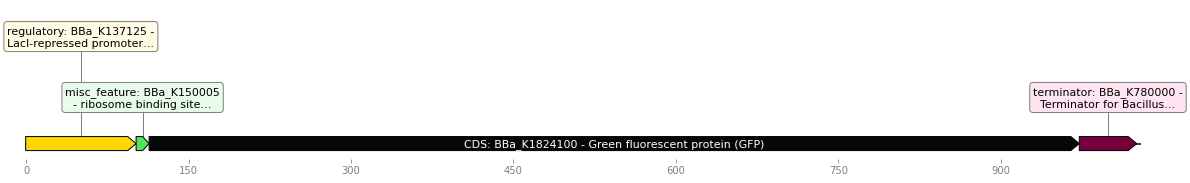

In [ ]:
# @markdown # Genetic Assembly
# @markdown Run this section to plot your sequence


name = [x for x in mammal.result[0] if x.strip()]
seq = [x for x in mammal.result[1] if x.strip()]
btype = [x for x in mammal.result[2] if x.strip()]


colors = ['#FFD700', '#55E35E' ,'#04080B' ,'#77003C' ,'#0ED0E1', '#009944', '#CF000F', '#F0541E', '#63C0DF', '#FFFFFF']

length = []

for i in seq:
  length.append(len(i)) 

features = []

ginitio = 0


for i in range(len(name)):
  gfinal =  ginitio + len(seq[i]) -1
  features= features + [GraphicFeature(start = ginitio, 
                            end   = gfinal, 
                            strand= +1, 
                            color=colors[i],
                            label= str(btype[i])+": " + name[i])]
  ginitio = gfinal

record = GraphicRecord(sequence_length=sum(length), features=features)
ax, _ = record.plot(figure_width=20)

ax.figure.savefig('assembly.png', bbox_inches='tight')





In [ ]:
# @markdown # .GB file format
# @markdown Your sequence is ready! Copy this text and save it in a .gb file so you can view and work with it in SnapGene



# Block function

def block(type_element, name, pi, pf, col):

  space = " "*(21-len(type_element))
  
  element = ["    "+ str(type_element)+space+str(pi)+".."+str(pf),
             "                         "+"/label="+  str(name),
             "                         "+"/ApEinfo_revcolor="+ str(col),
             "                         "+"/ApEinfo_fwdcolor="+str(col),
             '']
  
  for i in element:
    print(i)
    f.write(i + "\n")
  return element

# Function

def split10(s1):
  s10 = [(s1[i:i+10]) for i in range(0, len(s1), 10)]
  srow = " ".join(s10)
  return srow

def origin(seq):

  origin_list = []
  s60 = [(seq[i:i+60]) for i in range(0, len(seq), 60)]

  n = 0
  for i in s60:
    index = n*60 + 1
    space_index = str(index) + " "*(5-len(str(index)))  

    line = space_index + "  "+  split10(i)

    origin_list.append(line)
    print(line)
    f.write(line + "\n")
    n = n+1

  #return origin_list


#with open('/content/drive/MyDrive/Ciclo 9/AutoPython/Archivos Importantes/Example1.gbtxt', 'w') as writefile:
#    writefile.write("This is line A\n")
#    writefile.write("This is line B\n")

# Inicia desde aqui

name_seq = name
dna_seq = seq
type_seq = btype #["misc_feature","misc_feature","misc_feature"]

colors = ['#FFD700', '#55E35E' ,'#04080B' ,'#77003C' ,'#0ED0E1', '#009944', '#CF000F', '#F0541E', '#63C0DF', '#FFFFFF']

full_seq = "".join(dna_seq)
full_name_seq = "_".join(name_seq)

head = ["LOCUS"+"     "+full_name_seq+" "+str(len(full_seq))+" bp ds-DNA     linear",
          "DEFINITION",
          "FEATURES                 Location/Qualifiers"]



f= open(str(full_name_seq)+".gb","w+")

for i in head:
  print(i)
  f.write(i + "\n")

pinitio = 1 # contador de posicion
for i in range(len(dna_seq)):
  
  pfinal =  pinitio + len(dna_seq[i]) -1
  block(type_seq[i], name_seq[i],pinitio, pfinal, colors[i])
  pinitio = pfinal+1

print("ORIGIN")
f.write("ORIGIN" + "\n")

origin(full_seq)

f.close()
files.download(str(full_name_seq)+".gb")

LOCUS     BBa_K137125 - LacI-repressed promoter B4_BBa_K150005 - ribosome binding site of pTrc99a_BBa_K1824100 - Green fluorescent protein (GFP)_BBa_K780000 - Terminator for Bacillus subtilis 1030 bp ds-DNA     linear
DEFINITION
FEATURES                 Location/Qualifiers
    regulatory           1..103
                         /label=BBa_K137125 - LacI-repressed promoter B4
                         /ApEinfo_revcolor=#FFD700
                         /ApEinfo_fwdcolor=#FFD700

    misc_feature         104..116
                         /label=BBa_K150005 - ribosome binding site of pTrc99a
                         /ApEinfo_revcolor=#55E35E
                         /ApEinfo_fwdcolor=#55E35E

    CDS                  117..976
                         /label=BBa_K1824100 - Green fluorescent protein (GFP)
                         /ApEinfo_revcolor=#04080B
                         /ApEinfo_fwdcolor=#04080B

    terminator           977..1030
                         /label=BBa_K780000 - Termi

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[texto del vínculo](https://)# CRISPR (Gene editing tool)

# User Instructions

1. **Obtain** sgRNA sequences through the following links: 
  *   https://chopchop.cbu.uib.no/ 
  *   https://design.synthego.com/#/ 
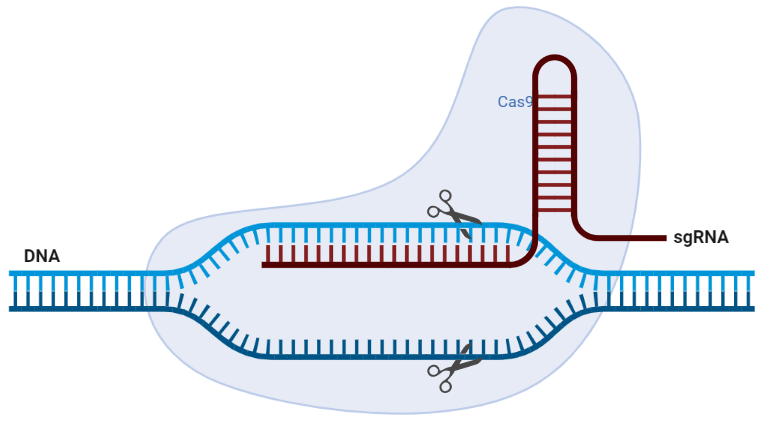

2. **Choose** or type the promoter, gene and terminator for both Cas9 and gRNA assembly
3. **Download** the .gb file which contains the assembled sequence

In [ ]:
# @markdown # Run to show widget
# @markdown Select the components and do not forget to press OK


# ------------------------cas9 elements Selection----------------------------------------------------------
#############################################
cas9_promoter_buttonW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False 
)

cas9_promoter_dropdownW = widgets.Combobox(
    options=  [''],
    description='Full:',
    disabled = False
)
###############################################

cas9_gene_buttonW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)
cas9_gene_dropdownW = widgets.Combobox(
    options=  [''],
    description='Full:',
    disabled = False
)
#############################################
cas9_terminator_buttonW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)
cas9_terminator_dropdownW = widgets.Combobox(
    options=  [''],
    description='Full:',
    disabled = False
)



# ------------------------cas9 customer ----------------------------------------------------------

##########################################
cas9_promoter_button_customW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)
cas9_promoter_name_customW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)
cas9_promoter_seq_customW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)
##########################################
cas9_gene_button_customW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)
cas9_gene_name_customW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)
cas9_gene_seq_customW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)
##########################################
cas9_terminator_button_customW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)
cas9_terminator_name_customW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)
cas9_terminator_seq_customW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)



################################################ cas9 Upload

cas9_promoter_uploadW = widgets.FileUpload(
    accept='.fasta',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)

cas9_promoter_upload_buttonW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)



#-----------------------------------------------------------------------
cas9_gene_uploadW = widgets.FileUpload(
    accept='.fasta',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)

cas9_gene_upload_buttonW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)
#-----------------------------------------------------------------------
cas9_terminator_uploadW = widgets.FileUpload(
    accept='.fasta',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)

cas9_terminator_upload_buttonW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)



# ------------------------gRNA-----------------------------
###################################### PROMOTER
gRNA_promoter_buttonW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)
gRNA_promoter_dropdownW = widgets.Combobox(
    options=  [''],
    description='Full:',
    disabled = False
)
############################### PROMOTER CUSTOMER
gRNA_promoter_button_customW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)
gRNA_promoter_name_customW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)
gRNA_promoter_seq_customW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)

############################# gRNA CUSTOMER-------------------------------------
gRNA_element_button_customW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)



gRNA_element_name_customW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)
gRNA_element_seq_customW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)

###################################### TERMINATOR
gRNA_terminator_buttonW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)
gRNA_terminator_dropdownW = widgets.Combobox(
    options=  [''],
    description='Full:',
    disabled = False
)
############################### TERMINATOR CUSTOMER
gRNA_terminator_button_customW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)
gRNA_terminator_name_customW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)
gRNA_terminator_seq_customW = widgets.Text(
    placeholder='Type name',
    description='Name:',
    disabled=False
)

################################################ gRNA Upload

gRNA_promoter_uploadW = widgets.FileUpload(
    accept='.fasta',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)

gRNA_promoter_upload_buttonW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)

#-----------------------------------------------------------------------
gRNA_terminator_uploadW = widgets.FileUpload(
    accept='.fasta',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)

gRNA_terminator_upload_buttonW = widgets.ToggleButton(
    value=False,
    description='OK',
    disabled=False
)



#########################################################
file = open('assembly.png', "rb")
image = file.read()
assemblyW = widgets.Image(
    value= image,
    format='png',
    width=300,
    height=300)

gRNA_file = open('assembly.png', "rb")
gRNA_image = gRNA_file.read()
gRNA_assemblyW = widgets.Image(
    value= gRNA_image,
    format='png',
    width=300,
    height=300)



cas9_promoter_dropdownW.options =  list(d1['eukaryote(plant)']['prom']['fullpro'].keys())
cas9_gene_dropdownW.options = ["Cas9"]
cas9_terminator_dropdownW.options = list(d1['eukaryote(plant)']['term'].keys())

gRNA_promoter_dropdownW.options = list(d1['eukaryote(plant)']['prom']['fullpro'].keys())
gRNA_terminator_dropdownW.options = list(d1['eukaryote(plant)']['term'].keys())




class Element:

    def name(self):
      return self.name
    
    def sequence(self):
      return self.sequence

    def classification(self):
      return self.classification




#################################################   FUNCTION

def function_crispr(
    cas9_promoter_button,
    cas9_promoter_dropdown,

    cas9_gene_button,
    cas9_gene_dropdown,

    cas9_terminator_button,
    cas9_terminator_dropdown,

    cas9_promoter_button_custom,
    cas9_promoter_name_custom,
    cas9_promoter_seq_custom,

    cas9_gene_button_custom,
    cas9_gene_name_custom,
    cas9_gene_seq_custom,

    cas9_terminator_button_custom,
    cas9_terminator_name_custom,
    cas9_terminator_seq_custom,

    cas9_promoter_upload,
    cas9_promoter_upload_button,
    cas9_gene_upload,
    cas9_gene_upload_button,
    cas9_terminator_upload,
    cas9_terminator_upload_button,


    gRNA_promoter_button,
    gRNA_promoter_dropdown,

    gRNA_promoter_button_custom,
    gRNA_promoter_name_custom,
    gRNA_promoter_seq_custom,


    gRNA_element_button_custom,
    gRNA_element_name_custom,    
    gRNA_element_seq_custom,


    gRNA_terminator_button,
    gRNA_terminator_dropdown,

    gRNA_terminator_button_custom,
    gRNA_terminator_name_custom,
    gRNA_terminator_seq_custom,  

    gRNA_promoter_upload,
    gRNA_promoter_upload_button,
    gRNA_terminator_upload,
    gRNA_terminator_upload_button):

  
  
  cas9_promoter = Element()
  cas9_gene = Element()
  cas9_terminator = Element()

  gRNA_promoter = Element()
  gRNA_element = Element()
  gRNA_terminator = Element()




  
  # ------------------Promoter cas9--------------------------------------------------
  if cas9_promoter_button == True and cas9_promoter_button_custom == False and cas9_promoter_upload_button == False:
    cas9_promoter.name = cas9_promoter_dropdown
    cas9_promoter.sequence = d1['eukaryote(plant)']['prom']['fullpro'][cas9_promoter_dropdown]
    cas9_promoter.classification = 'regulatory'

  
  elif cas9_promoter_button == False and cas9_promoter_button_custom == True and cas9_promoter_upload_button == False:
    cas9_promoter.name = cas9_promoter_name_custom
    cas9_promoter.sequence = cas9_promoter_seq_custom
    cas9_promoter.classification = 'regulatory'

  elif cas9_promoter_button == True and cas9_promoter_button_custom == False and cas9_promoter_upload_button == True:
    a,b = fasta_read(cas9_promoter_uploadW)
    cas9_promoter.name = a
    cas9_promoter.sequence = b
    cas9_promoter.classification = 'regulatory'
  else:
    cas9_promoter.name = ""
    cas9_promoter.sequence = ""
    cas9_promoter.classification = ''

  

  # ------------------Gene cas9--------------------------------------------------
  
  if cas9_gene_button == True and cas9_gene_button_custom == False and cas9_gene_upload_button == False:
    cas9_gene.name = cas9_gene_dropdown
    cas9_gene.sequence = "aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa"
    cas9_gene.classification = 'CDS'

  
  elif cas9_gene_button == False and cas9_gene_button_custom == True and cas9_gene_upload_button == False:
    cas9_gene.name = cas9_gene_name_custom
    cas9_gene.sequence = cas9_gene_seq_custom
    cas9_gene.classification = 'CDS'
  
  elif cas9_gene_button == False and cas9_gene_button_custom == False and cas9_gene_upload_button == True:
    c,d = fasta_read(cas9_promoter_uploadW)
    cas9_promoter.name = c
    cas9_promoter.sequence = d
    cas9_promoter.classification = 'CDS'


  else:
    cas9_gene.name = ""
    cas9_gene.sequence = ""
    cas9_gene.classification = ''


  # ------------------Terminator cas9--------------------------------------------------
  if cas9_terminator_button == True and cas9_terminator_button_custom == False and cas9_terminator_upload_button==False:
    cas9_terminator.name = cas9_terminator_dropdown
    cas9_terminator.sequence = d1['eukaryote(plant)']['term'][cas9_terminator_dropdown]
    cas9_terminator.classification = 'terminator'

  
  elif cas9_terminator_button == False and cas9_terminator_button_custom == True and cas9_terminator_upload_button==False:

    cas9_terminator.name = cas9_terminator_name_custom
    cas9_terminator.sequence = cas9_terminator_seq_custom
    cas9_terminator.classification = 'terminator'

  elif cas9_terminator_button == False and cas9_terminator_button_custom == False and cas9_terminator_upload_button==True:
    e,f = fasta_read(cas9_terminator_uploadW)
    cas9_promoter.name = e
    cas9_promoter.sequence = f
    cas9_promoter.classification = 'terminator'

  else:
    cas9_terminator.name = ""
    cas9_terminator.sequence = ""
    cas9_terminator.classification = ''

  scaffold_seq = d1['eukaryote(plant)']['other']['scaffold']

###################################################################################

  # ------------------Promoter gRNA--------------------------------------------------
  
  if gRNA_promoter_button == True and gRNA_promoter_button_custom == False and gRNA_promoter_upload_button==False:
    gRNA_promoter.name = gRNA_promoter_dropdown 
    gRNA_promoter.sequence = d1['eukaryote(plant)']['prom']['fullpro'][gRNA_promoter_dropdown]
    gRNA_promoter.classification = 'regulatory'

  
  elif gRNA_promoter_button == False and gRNA_promoter_button_custom == True and gRNA_promoter_upload_button==False:

    gRNA_promoter.name = gRNA_promoter_name_custom
    gRNA_promoter.sequence = gRNA_promoter_seq_custom
    gRNA_promoter.classification = 'regulatory'

  elif gRNA_promoter_button == False and gRNA_promoter_button_custom == False and gRNA_promoter_upload_button==True:
    g, h = fasta_read(gRNA_promoter_uploadW)
    gRNA_promoter.name = g
    gRNA_promoter.sequence = h
    gRNA_promoter.classification = 'regulatory'

  else:
    gRNA_promoter.name = ""
    gRNA_promoter.sequence = ""
    gRNA_promoter.classification = ''

  
  # ------------------Element gRNA--------------------------------------------------
  
  if gRNA_element_button_custom ==  True:
    gRNA_element.name = gRNA_element_name_custom
    gRNA_element.sequence = gRNA_element_seq_custom
    gRNA_element.classification = 'gRNA'

  else:
    gRNA_element.name = ""
    gRNA_element.sequence = ""
    gRNA_element.classification = ''
  
  
  # ------------------Terminator gRNA--------------------------------------------------

  if gRNA_terminator_button == True and gRNA_terminator_button_custom == False and gRNA_terminator_upload_button==False:
    gRNA_terminator.name = gRNA_terminator_dropdown
    gRNA_terminator.sequence = d1['eukaryote(plant)']['term'][gRNA_terminator_dropdown]
    gRNA_terminator.classification = 'terminator'

  
  elif gRNA_terminator_button == False and gRNA_terminator_button_custom == True and gRNA_terminator_upload_button==False:

    gRNA_terminator.name = gRNA_terminator_name_custom
    gRNA_terminator.sequence = gRNA_terminator_seq_custom
    gRNA_terminator.classification = 'terminator'

  elif gRNA_terminator_button == False and gRNA_terminator_button_custom == False and gRNA_terminator_upload_button== True:

    j, k= fasta_read(gRNA_terminator_uploadW)
    gRNA_terminator.name = j
    gRNA_terminator.sequence = k
    gRNA_terminator.classification = 'terminator'

  else:
    gRNA_terminator.name = ""
    gRNA_terminator.sequence = ""
    gRNA_terminator.classification = ''

  # Assembly Cas9 Cassette

  name = [cas9_promoter.name, cas9_gene.name, cas9_terminator.name]
  seq = [cas9_promoter.sequence, cas9_gene.sequence, cas9_terminator.sequence]
  btype = [cas9_promoter.classification , cas9_gene.classification, cas9_terminator.classification]
  colors = ['#FFD700', '#55E35E' ,'#04080B' ,'#77003C' ,'#0ED0E1', '#009944', '#CF000F', '#F0541E', '#63C0DF', '#FFFFFF']

  print(name, seq, btype)
  length = []

  for i in seq:
    length.append(len(i)) 

  features = []

  ginitio = 0


  for i in range(len(name)):
    gfinal =  ginitio + len(seq[i]) -1
    features= features + [GraphicFeature(start = ginitio, 
                              end   = gfinal, 
                              strand= +1, 
                              color=colors[i],
                              label= str(btype[i])+": " + name[i])]
    ginitio = gfinal

  record = GraphicRecord(sequence_length=sum(length), features=features)
  ax, _ = record.plot(figure_width=20)
  ax.figure.savefig('assembly.png', bbox_inches='tight')


  file = open('assembly.png', "rb")
  image = file.read()
  assemblyW.value= image
  assemblyW.width = 1500
  assemblyW.height = 1500

  # Assembly gRNA Cassette

  name_gRNA = [gRNA_promoter.name, gRNA_element.name, gRNA_terminator.name]
  seq_gRNA = [gRNA_promoter.sequence, gRNA_element.sequence, gRNA_terminator.sequence]
  btype_gRNA = [gRNA_promoter.classification , gRNA_element.classification, gRNA_terminator.classification]
  colors = ['#FFD700', '#55E35E' ,'#04080B' ,'#77003C' ,'#0ED0E1', '#009944', '#CF000F', '#F0541E', '#63C0DF', '#FFFFFF']


  gRNA_length = []

  for i in seq_gRNA:
    gRNA_length.append(len(i)) 

  gRNA_features = []

  ginitio = 0


  for i in range(len(name_gRNA)):
    gfinal =  ginitio + len(seq_gRNA[i]) -1
    gRNA_features= gRNA_features + [GraphicFeature(start = ginitio, 
                              end   = gfinal, 
                              strand= +1, 
                              color=colors[i],
                              label= str(btype_gRNA[i])+": " + name_gRNA[i])]
    ginitio = gfinal

  gRNA_record = GraphicRecord(sequence_length=sum(gRNA_length), features=gRNA_features)
  gRNA_ax, _ = gRNA_record.plot(figure_width=20)
  gRNA_ax.figure.savefig('gRNA_assembly.png', bbox_inches='tight')


  gRNA_file = open('gRNA_assembly.png', "rb")
  gRNA_image = gRNA_file.read()
  gRNA_assemblyW.value= gRNA_image
  gRNA_assemblyW.width = 1500
  gRNA_assemblyW.height = 1500


  print(cas9_gene.__dict__,
  cas9_promoter.__dict__ ,
  cas9_gene.__dict__,
  cas9_terminator.__dict__, 
  gRNA_promoter.__dict__ ,
  gRNA_element.__dict__,
  gRNA_terminator.__dict__)



  return   cas9_promoter ,cas9_gene,cas9_terminator, gRNA_promoter ,gRNA_element,gRNA_terminator




crispr = widgets.interactive(    function_crispr,
    cas9_promoter_button = cas9_promoter_buttonW,
    cas9_promoter_dropdown = cas9_promoter_dropdownW,

    cas9_gene_button = cas9_gene_buttonW,
    cas9_gene_dropdown = cas9_gene_dropdownW,

    cas9_terminator_button = cas9_terminator_buttonW,
    cas9_terminator_dropdown  = cas9_terminator_dropdownW,

    cas9_promoter_button_custom = cas9_promoter_button_customW,
    cas9_promoter_name_custom = cas9_promoter_name_customW,
    cas9_promoter_seq_custom = cas9_promoter_seq_customW,

    cas9_gene_button_custom = cas9_gene_button_customW,
    cas9_gene_name_custom = cas9_gene_name_customW,
    cas9_gene_seq_custom  = cas9_gene_seq_customW  ,

    cas9_terminator_button_custom = cas9_terminator_button_customW,
    cas9_terminator_name_custom = cas9_terminator_name_customW,
    cas9_terminator_seq_custom  = cas9_terminator_seq_customW,

    cas9_promoter_upload = cas9_promoter_uploadW,
    cas9_promoter_upload_button = cas9_promoter_upload_buttonW,
    cas9_gene_upload =cas9_gene_uploadW,
    cas9_gene_upload_button = cas9_gene_upload_buttonW,
    cas9_terminator_upload = cas9_terminator_uploadW,
    cas9_terminator_upload_button = cas9_terminator_upload_buttonW,

    gRNA_promoter_button = gRNA_promoter_buttonW,
    gRNA_promoter_dropdown = gRNA_promoter_dropdownW,

    gRNA_promoter_button_custom = gRNA_promoter_button_customW,
    gRNA_promoter_name_custom = gRNA_promoter_name_customW,
    gRNA_promoter_seq_custom = gRNA_promoter_seq_customW,


    gRNA_element_button_custom = gRNA_element_button_customW,
    gRNA_element_name_custom = gRNA_element_name_customW,    
    gRNA_element_seq_custom = gRNA_element_seq_customW,

    gRNA_terminator_button = gRNA_terminator_buttonW,
    gRNA_terminator_dropdown = gRNA_terminator_dropdownW,

    gRNA_terminator_button_custom = gRNA_terminator_button_customW,
    gRNA_terminator_name_custom = gRNA_terminator_name_customW ,
    gRNA_terminator_seq_custom = gRNA_terminator_seq_customW,
    
    gRNA_promoter_upload = gRNA_promoter_uploadW,
    gRNA_promoter_upload_button = gRNA_promoter_upload_buttonW,
    gRNA_terminator_upload = gRNA_terminator_uploadW,
    gRNA_terminator_upload_button = gRNA_terminator_upload_buttonW
    
    )



####### Widget 

from ipywidgets import Button, Layout

cas9_promoter_title = widgets.HTML(
    value="<b>Promoter</b>",
    placeholder='Personalized gene',
    description=''
)


cas9_promoter_html = widgets.HTML(
    value="Select a <b>promoter element</b> and press OK:",
    placeholder='Personalized gene',
    description='',
)

cas9_promoter_html_customer = widgets.HTML(
    value="Insert your <b>promoter element</b> and press OK::",
    placeholder='Personalized gene',
    description='',
)



cas9_gene_title = widgets.HTML(
    value="<b>Cas gene</b>",
    placeholder='Personalized gene',
    description='',
)


cas9_gene_html = widgets.HTML(
    value="Select a <b>gene element</b> and press OK:",
    placeholder='Personalized gene',
    description='',
)

cas9_gene_html_customer = widgets.HTML(
    value="Insert your <b>gene element</b> and press OK::",
    placeholder='Personalized gene',
    description='',
)



cas9_terminator_title = widgets.HTML(
    value="<b>Terminator</b>",
    placeholder='Personalized gene',
    description='',
)

cas9_terminator_html = widgets.HTML(
    value="Select a <b>terminator element</b> and press OK:",
    placeholder='Personalized gene',
    description='',
)

cas9_terminator_html_customer = widgets.HTML(
    value="Insert your <b>terminator element</b> and press OK::",
    placeholder='Personalized gene',
    description='',
)






# html upload cas9
cas9_promoter_html_upload = widgets.HTML(
    value="Or upload a <b>fasta file</b> with promoter sequence:",
    placeholder='Personalized promoter',
    description='',
)

cas9_gene_html_upload = widgets.HTML(
    value="Or upload a <b>fasta file</b> with with gene sequence",
    placeholder='Personalized promoter',
    description='',
)

cas9_terminator_html_upload = widgets.HTML(
    value="Or upload a <b>fasta file</b> with terminator",
    placeholder='Personalized promoter',
    description='',
)



######

gRNA_promoter_title = widgets.HTML(
    value="<b>Promoter</b>",
    placeholder='Personalized gene',
    description=''
)

gRNA_promoter_html = widgets.HTML(
    value="Select a <b>promoter element</b> and press OK:",
    placeholder='Personalized gene',
    description='',
)

gRNA_promoter_html_customer = widgets.HTML(
    value="Insert your <b>promoter element</b> and press OK::",
    placeholder='Personalized gene',
    description='',
)


gRNA_element_title = widgets.HTML(
    value="<b>Single-guide RNA (sgRNA)</b>",
    placeholder='Personalized gene',
    description=''
)

gRNA_element_html = widgets.HTML(
    value="Insert the <b>sgRNA element</b> and press OK::",
    placeholder='Personalized gene',
    description='',
)



gRNA_terminator_title = widgets.HTML(
    value="<b>Terminator</b>",
    placeholder='Personalized gene',
    description=''
)
gRNA_terminator_html = widgets.HTML(
    value="Select a <b>terminator element</b> and press OK:",
    placeholder='Personalized gene',
    description='',
)

gRNA_terminator_html_customer = widgets.HTML(
    value="Insert your <b>terminator element</b> and press OK::",
    placeholder='Personalized gene',
    description='',
)


#-- html gRNA upload
gRNA_promoter_html_upload = widgets.HTML(
    value="Or upload a <b>fasta file</b> with promoter sequence:",
    placeholder='Personalized promoter',
    description='',
)

gRNA_terminator_html_upload = widgets.HTML(
    value="Or upload a <b>fasta file</b> with terminator",
    placeholder='Personalized promoter',
    description='',
)


cas9_promoter_html_upload
cas9_gene_html_upload
cas9_terminator_html_upload

gRNA_promoter_html_upload
gRNA_terminator_html_upload

cas9_assembly = VBox ([cas9_promoter_title ,
                       
                       cas9_promoter_html,
                       HBox([cas9_promoter_dropdownW, cas9_promoter_buttonW]), 
                       
                       cas9_promoter_html_customer,
                       HBox([cas9_promoter_name_customW,  cas9_promoter_seq_customW, cas9_promoter_button_customW]),
                       
                       cas9_promoter_html_upload,                       
                       HBox([cas9_promoter_uploadW, cas9_promoter_upload_buttonW], 
                            layout=Layout( height='80px')),

                       
                       cas9_gene_title ,
                       
                       cas9_gene_html,
                       HBox([cas9_gene_dropdownW,cas9_gene_buttonW]),
                       
                       cas9_gene_html_customer,
                       HBox([cas9_gene_name_customW, cas9_gene_seq_customW, cas9_gene_button_customW]),
                       
                       cas9_gene_html_upload,
                       HBox([cas9_gene_uploadW, cas9_gene_upload_buttonW ], 
                            layout=Layout( height='80px')),
                       
                       cas9_terminator_title ,
                       
                       cas9_terminator_html,
                       HBox([cas9_terminator_dropdownW, cas9_terminator_buttonW]),
                       
                       cas9_terminator_html_customer,                       
                       HBox([cas9_terminator_name_customW,    cas9_terminator_seq_customW, cas9_terminator_button_customW]),
                       
                       cas9_terminator_html_upload,
                       HBox([cas9_terminator_uploadW, cas9_terminator_upload_buttonW], 
                            layout=Layout( height='80px'))                      
                       ])

gRNA_assembly = VBox ([gRNA_promoter_title,
                       gRNA_promoter_html,
                       HBox([gRNA_promoter_dropdownW, gRNA_promoter_buttonW]), 
                       gRNA_promoter_html_customer,
                       HBox([gRNA_promoter_name_customW,  gRNA_promoter_seq_customW, gRNA_promoter_button_customW]),
                       gRNA_promoter_html_upload,
                       HBox([gRNA_promoter_uploadW, gRNA_promoter_upload_buttonW], 
                            layout=Layout( height='80px')),                       
                       
                       gRNA_element_title,
                       gRNA_element_html,
                       HBox([gRNA_element_name_customW, gRNA_element_seq_customW, gRNA_element_button_customW], 
                            layout=Layout( height='80px')),
                       
                       gRNA_terminator_title,
                       gRNA_terminator_html,
                       HBox([gRNA_terminator_dropdownW, gRNA_terminator_buttonW]),
                       gRNA_terminator_html_customer,
                       HBox([gRNA_terminator_name_customW,    gRNA_terminator_seq_customW, gRNA_terminator_button_customW]),
                       gRNA_terminator_html_upload,
                       HBox([gRNA_terminator_uploadW, gRNA_terminator_upload_buttonW], 
                            layout=Layout( height='80px')),                       
                       ])






# Creation to visualizase
tab_nest = widgets.Tab()
tab_nest.children = [cas9_assembly ,gRNA_assembly] 
tab_nest.set_title(0, 'Cas9 Assembly')
tab_nest.set_title(1, 'gRNA Assembly')



assemblyW_html = widgets.HTML(
    value="<b>Cas9 assembly plot:</b>",
    placeholder='Personalized gene',
    description='',
)

gRNA_assemblyW_html = widgets.HTML(
    value="<b>gRNA assembly plot:</b>",
    placeholder='Personalized gene',
    description='',
)


VBox([tab_nest , 
      
      assemblyW_html,
      assemblyW, 

      gRNA_assemblyW_html,
      gRNA_assemblyW]) # Mostrar Tab

In [ ]:
# @markdown # .GB file format
# @markdown Your sequence is ready! Copy this text and save it in a .gb file so you can view and work with it in SnapGene

cas9_promoter = crispr.result[0]
cas9_gene= crispr.result[1]
cas9_terminator = crispr.result[2]
gRNA_promoter = crispr.result[3]
gRNA_element = crispr.result[4]
gRNA_terminator = crispr.result[5]

name_cas9 = [cas9_promoter.name, cas9_gene.name, cas9_terminator.name]
seq_cas9 = [cas9_promoter.sequence, cas9_gene.sequence, cas9_terminator.sequence]
btype_cas9 = [cas9_promoter.classification , cas9_gene.classification, cas9_terminator.classification]
colors = ['#FFD700', '#55E35E' ,'#04080B' ,'#77003C' ,'#0ED0E1', '#009944', '#CF000F', '#F0541E', '#63C0DF', '#FFFFFF']


name_gRNA = [gRNA_promoter.name, gRNA_element.name, gRNA_terminator.name]
seq_gRNA = [gRNA_promoter.sequence, gRNA_element.sequence, gRNA_terminator.sequence]
btype_gRNA = [gRNA_promoter.classification , gRNA_element.classification, gRNA_terminator.classification]
colors = ['#FFD700', '#55E35E' ,'#04080B' ,'#77003C' ,'#0ED0E1', '#009944', '#CF000F', '#F0541E', '#63C0DF', '#FFFFFF']

name_crispr = name_cas9 + name_gRNA
dna_crispr = seq_cas9 + seq_gRNA
type_crispr = btype_cas9 + btype_gRNA



def block(type_element, name, pi, pf, col):

  space = " "*(21-len(type_element))
  
  element = ["    "+ str(type_element)+space+str(pi)+".."+str(pf),
             "                         "+"/label="+  str(name),
             "                         "+"/ApEinfo_revcolor="+ str(col),
             "                         "+"/ApEinfo_fwdcolor="+str(col),
             '']
  
  for i in element:
    print(i)
    file_crispr.write(i + "\n")
  return element

# Function

def split10(s1):
  s10 = [(s1[i:i+10]) for i in range(0, len(s1), 10)]
  srow = " ".join(s10)
  return srow

def origin(seq):

  origin_list = []
  s60 = [(seq[i:i+60]) for i in range(0, len(seq), 60)]

  n = 0
  for i in s60:
    index = n*60 + 1
    space_index = str(index) + " "*(5-len(str(index)))  

    line = space_index + "  "+  split10(i)

    origin_list.append(line)
    print(line)
    file_crispr.write(line + "\n")
    n = n+1



colors = ['#FFD700', '#55E35E' ,'#04080B' ,'#77003C' ,'#0ED0E1', '#009944', '#CF000F', '#F0541E', '#63C0DF', '#FFFFFF']

full_seq = "".join(dna_crispr)
full_name_seq = "_".join(name_crispr)

head = ["LOCUS"+"     "+full_name_seq+" "+str(len(full_seq))+" bp ds-DNA     linear",
          "DEFINITION",
          "FEATURES                 Location/Qualifiers"]



file_crispr= open(str(full_name_seq)+".gb","w+")

for i in head:
  print(i)
  file_crispr.write(i + "\n")

pinitio = 1 # contador de posicion
for i in range(len(dna_crispr)):
  
  pfinal =  pinitio + len(dna_crispr[i]) -1
  block(type_crispr[i], name_crispr[i],pinitio, pfinal, colors[i])
  pinitio = pfinal+1

print("ORIGIN")
file_crispr.write("ORIGIN" + "\n")

origin(full_seq)

file_crispr.close()
files.download(str(full_name_seq)+".gb")


LOCUS     Ubc Promoter_Cas9_Nos_Ubc Promoter_thb_35S_CaMV_ter 3072 bp ds-DNA     linear
DEFINITION
FEATURES                 Location/Qualifiers
    regulatory           1..1219
                         /label=Ubc Promoter
                         /ApEinfo_revcolor=#FFD700
                         /ApEinfo_fwdcolor=#FFD700

    CDS                  1220..1269
                         /label=Cas9
                         /ApEinfo_revcolor=#55E35E
                         /ApEinfo_fwdcolor=#55E35E

    terminator           1270..1522
                         /label=Nos
                         /ApEinfo_revcolor=#04080B
                         /ApEinfo_fwdcolor=#04080B

    regulatory           1523..2741
                         /label=Ubc Promoter
                         /ApEinfo_revcolor=#77003C
                         /ApEinfo_fwdcolor=#77003C

    gRNA                 2742..2855
                         /label=thb
                         /ApEinfo_revcolor=#0ED0E1
                 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>